# Churn Prediction using Machine Learning

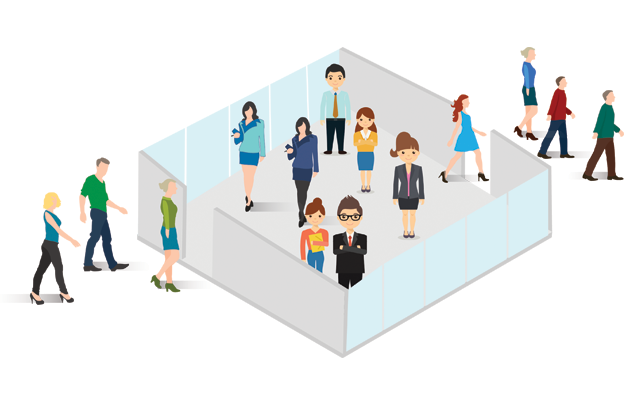

## Objective 

**Can you develop a model of machine learning that can predict customers who will leave the company?**

The aim is to estimate whether a bank's customers leave the bank or not. The event that defines the customer abandonment is the closing of the customer's bank account.

## Details about the dataset:
It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### **Variables:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Results 

The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. **(0.91244)**

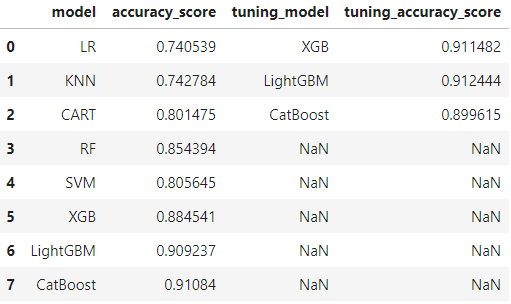

# 1) Data Understanding

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#Reading Data Set

df = pd.read_csv("churn.csv", index_col=0)
df.columns = map(str.lower, df.columns)
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2) Data Visualization

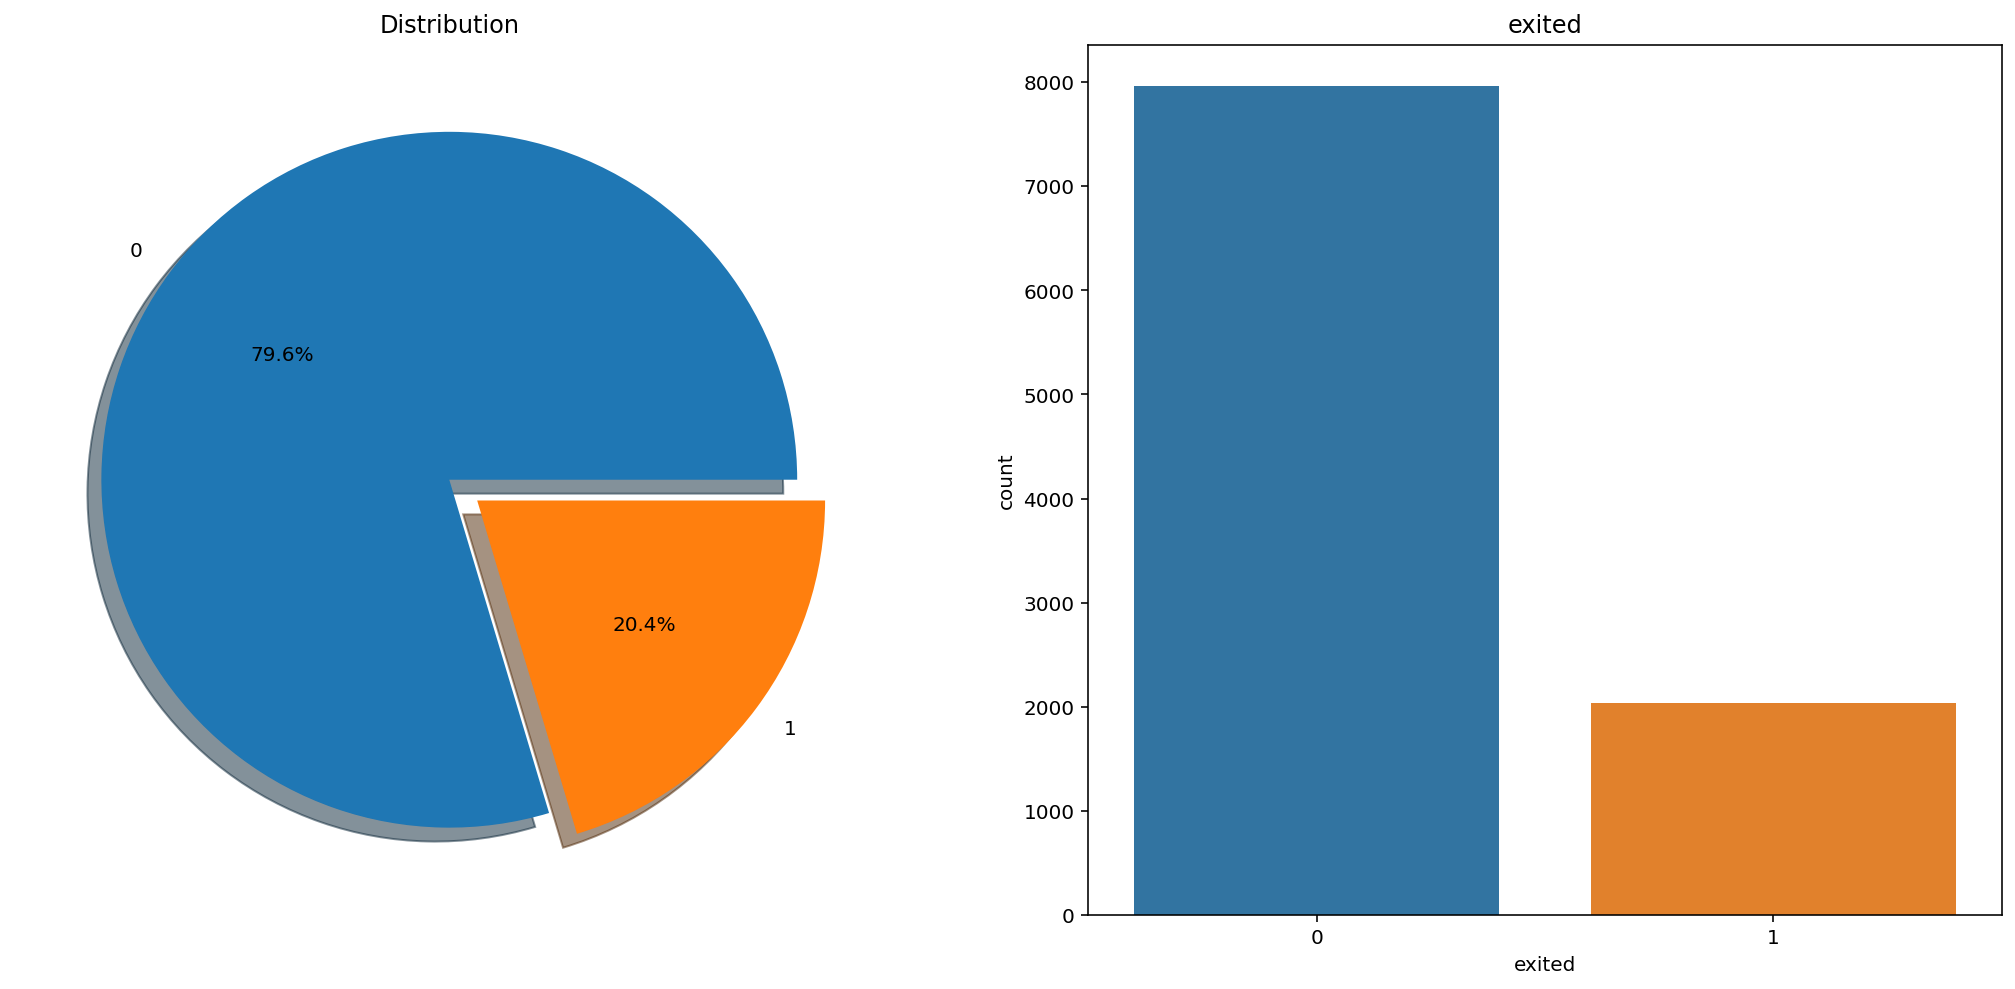

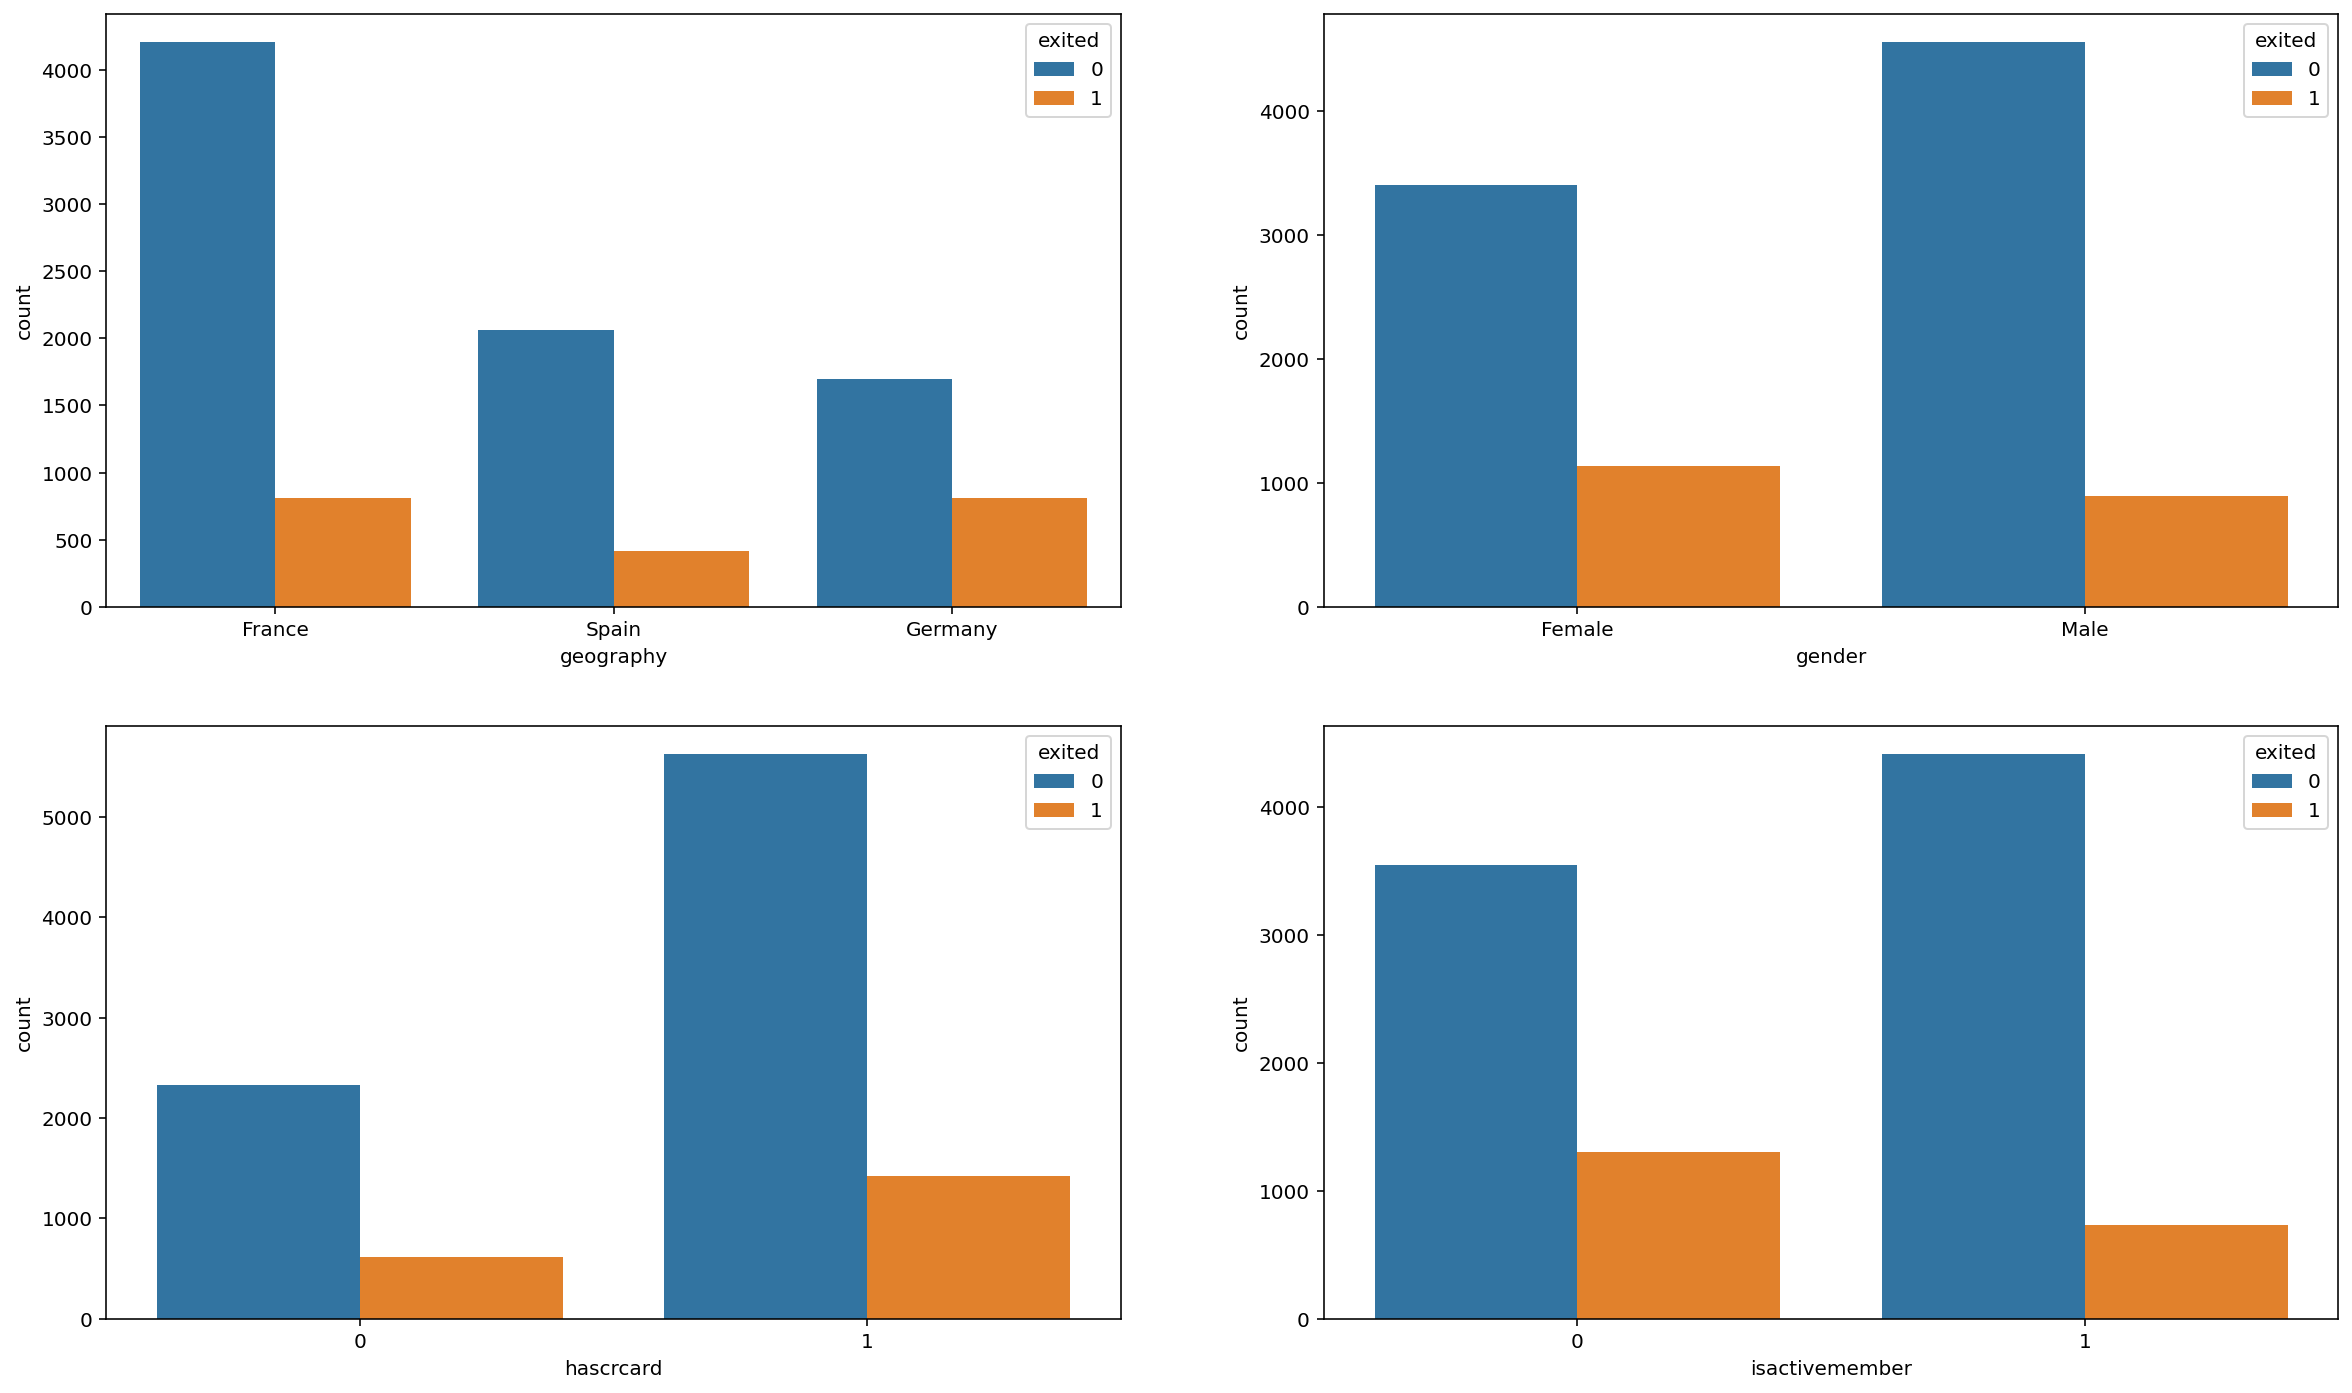

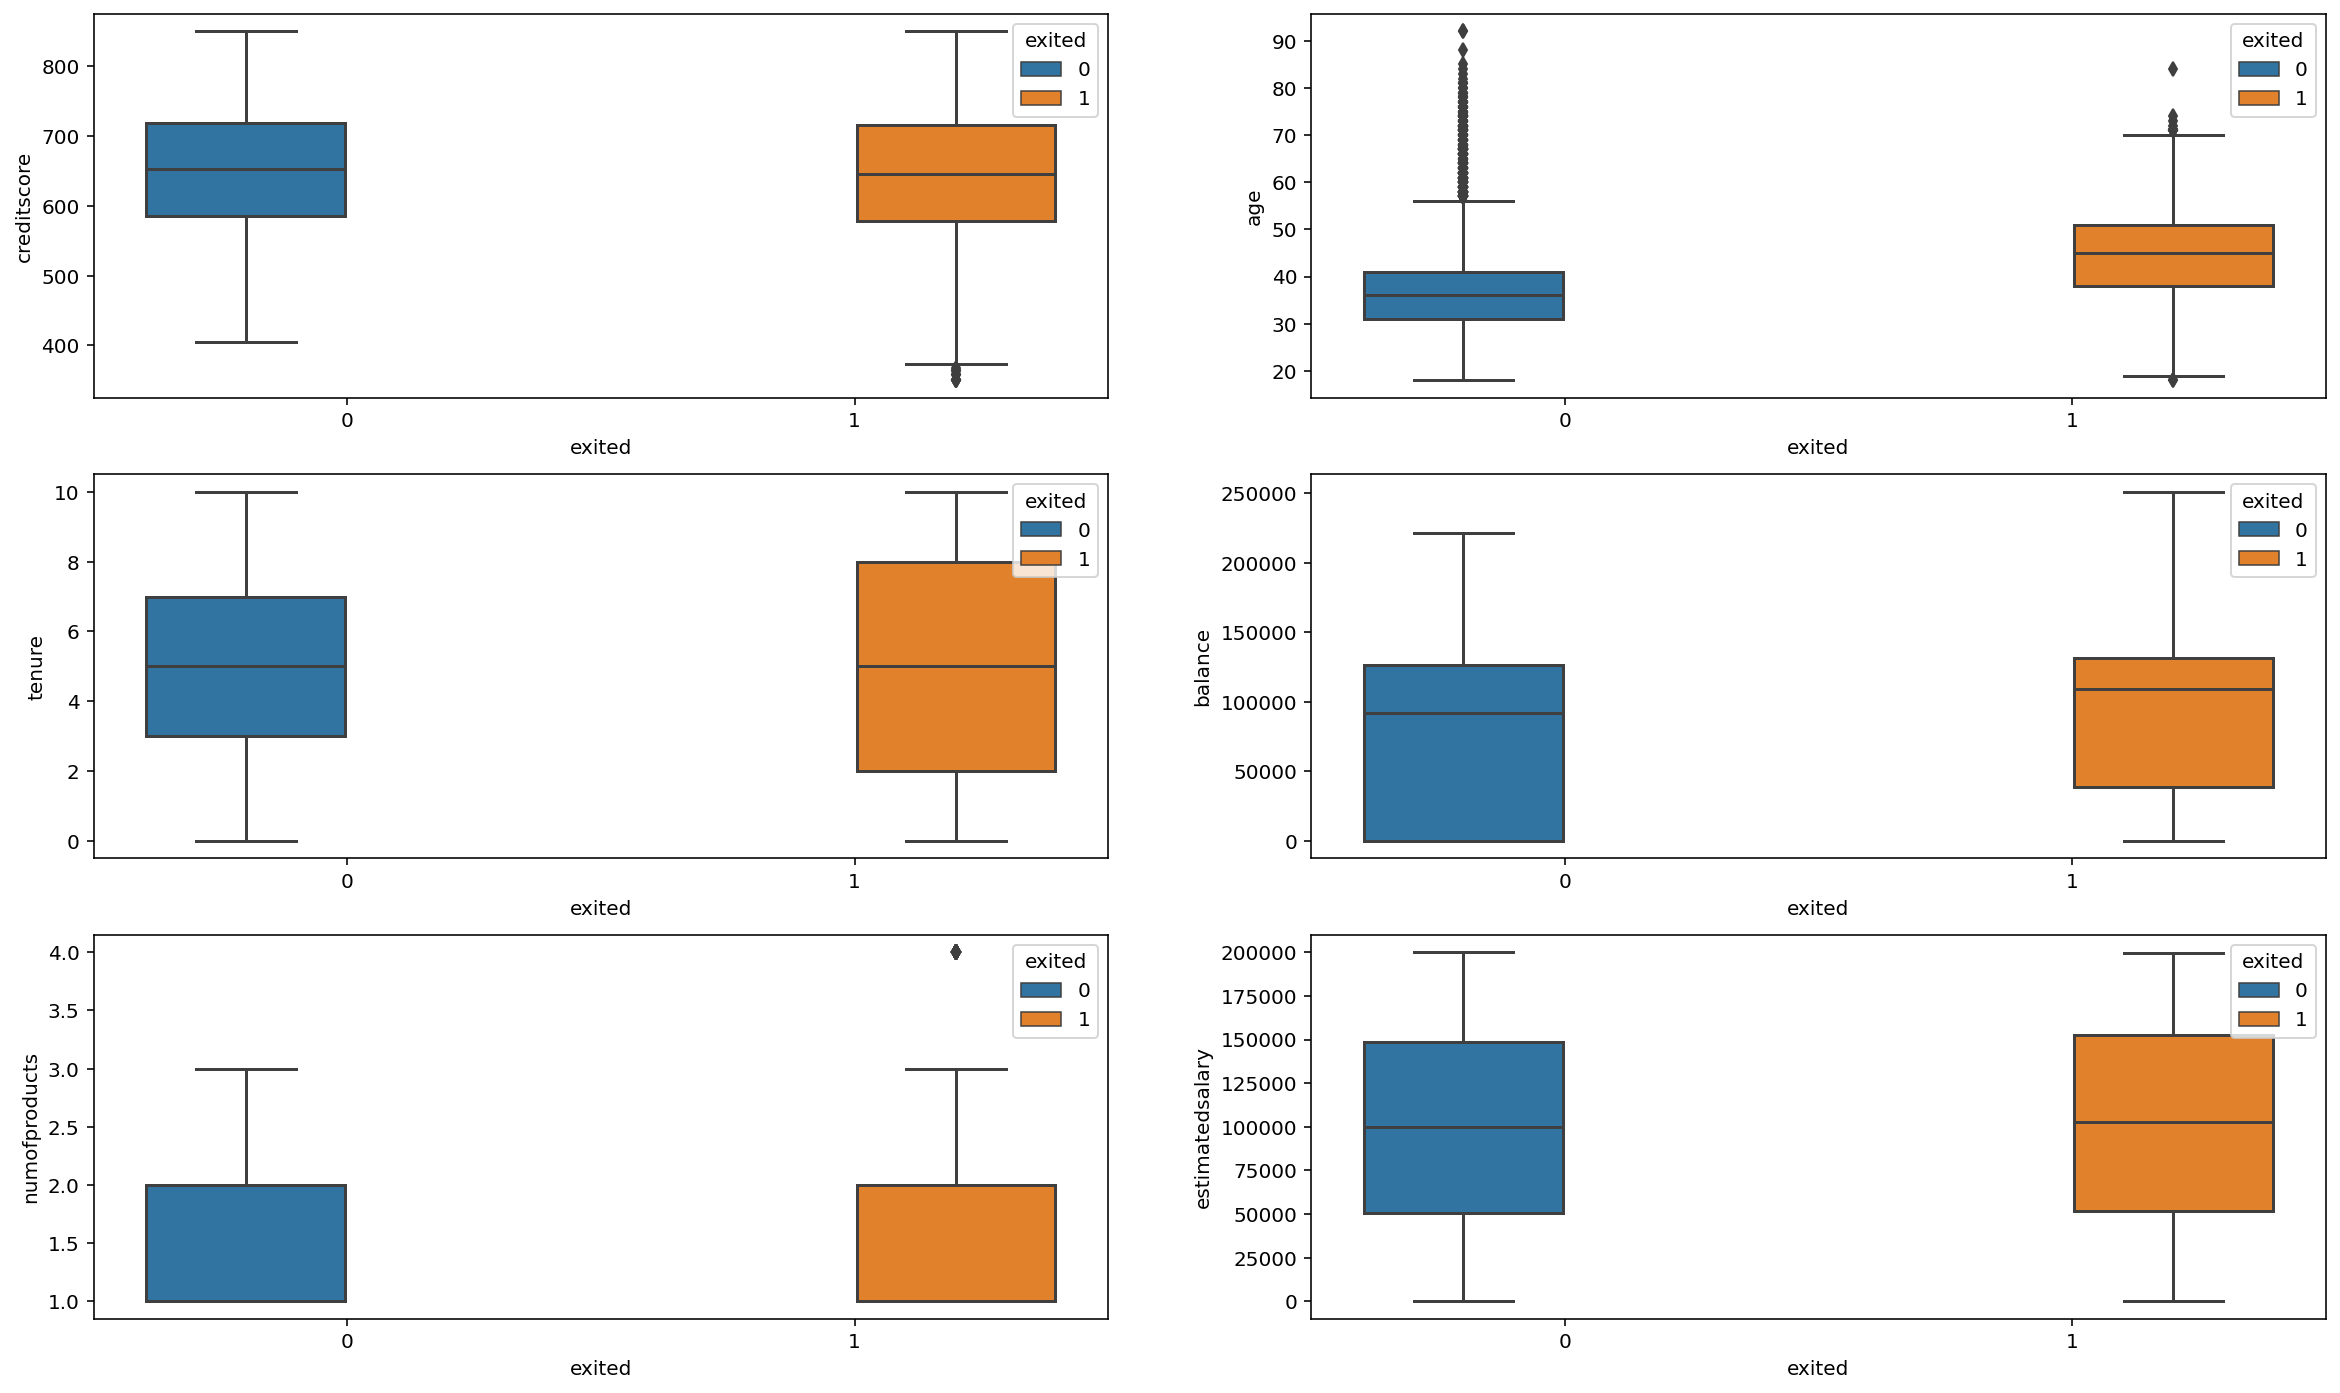

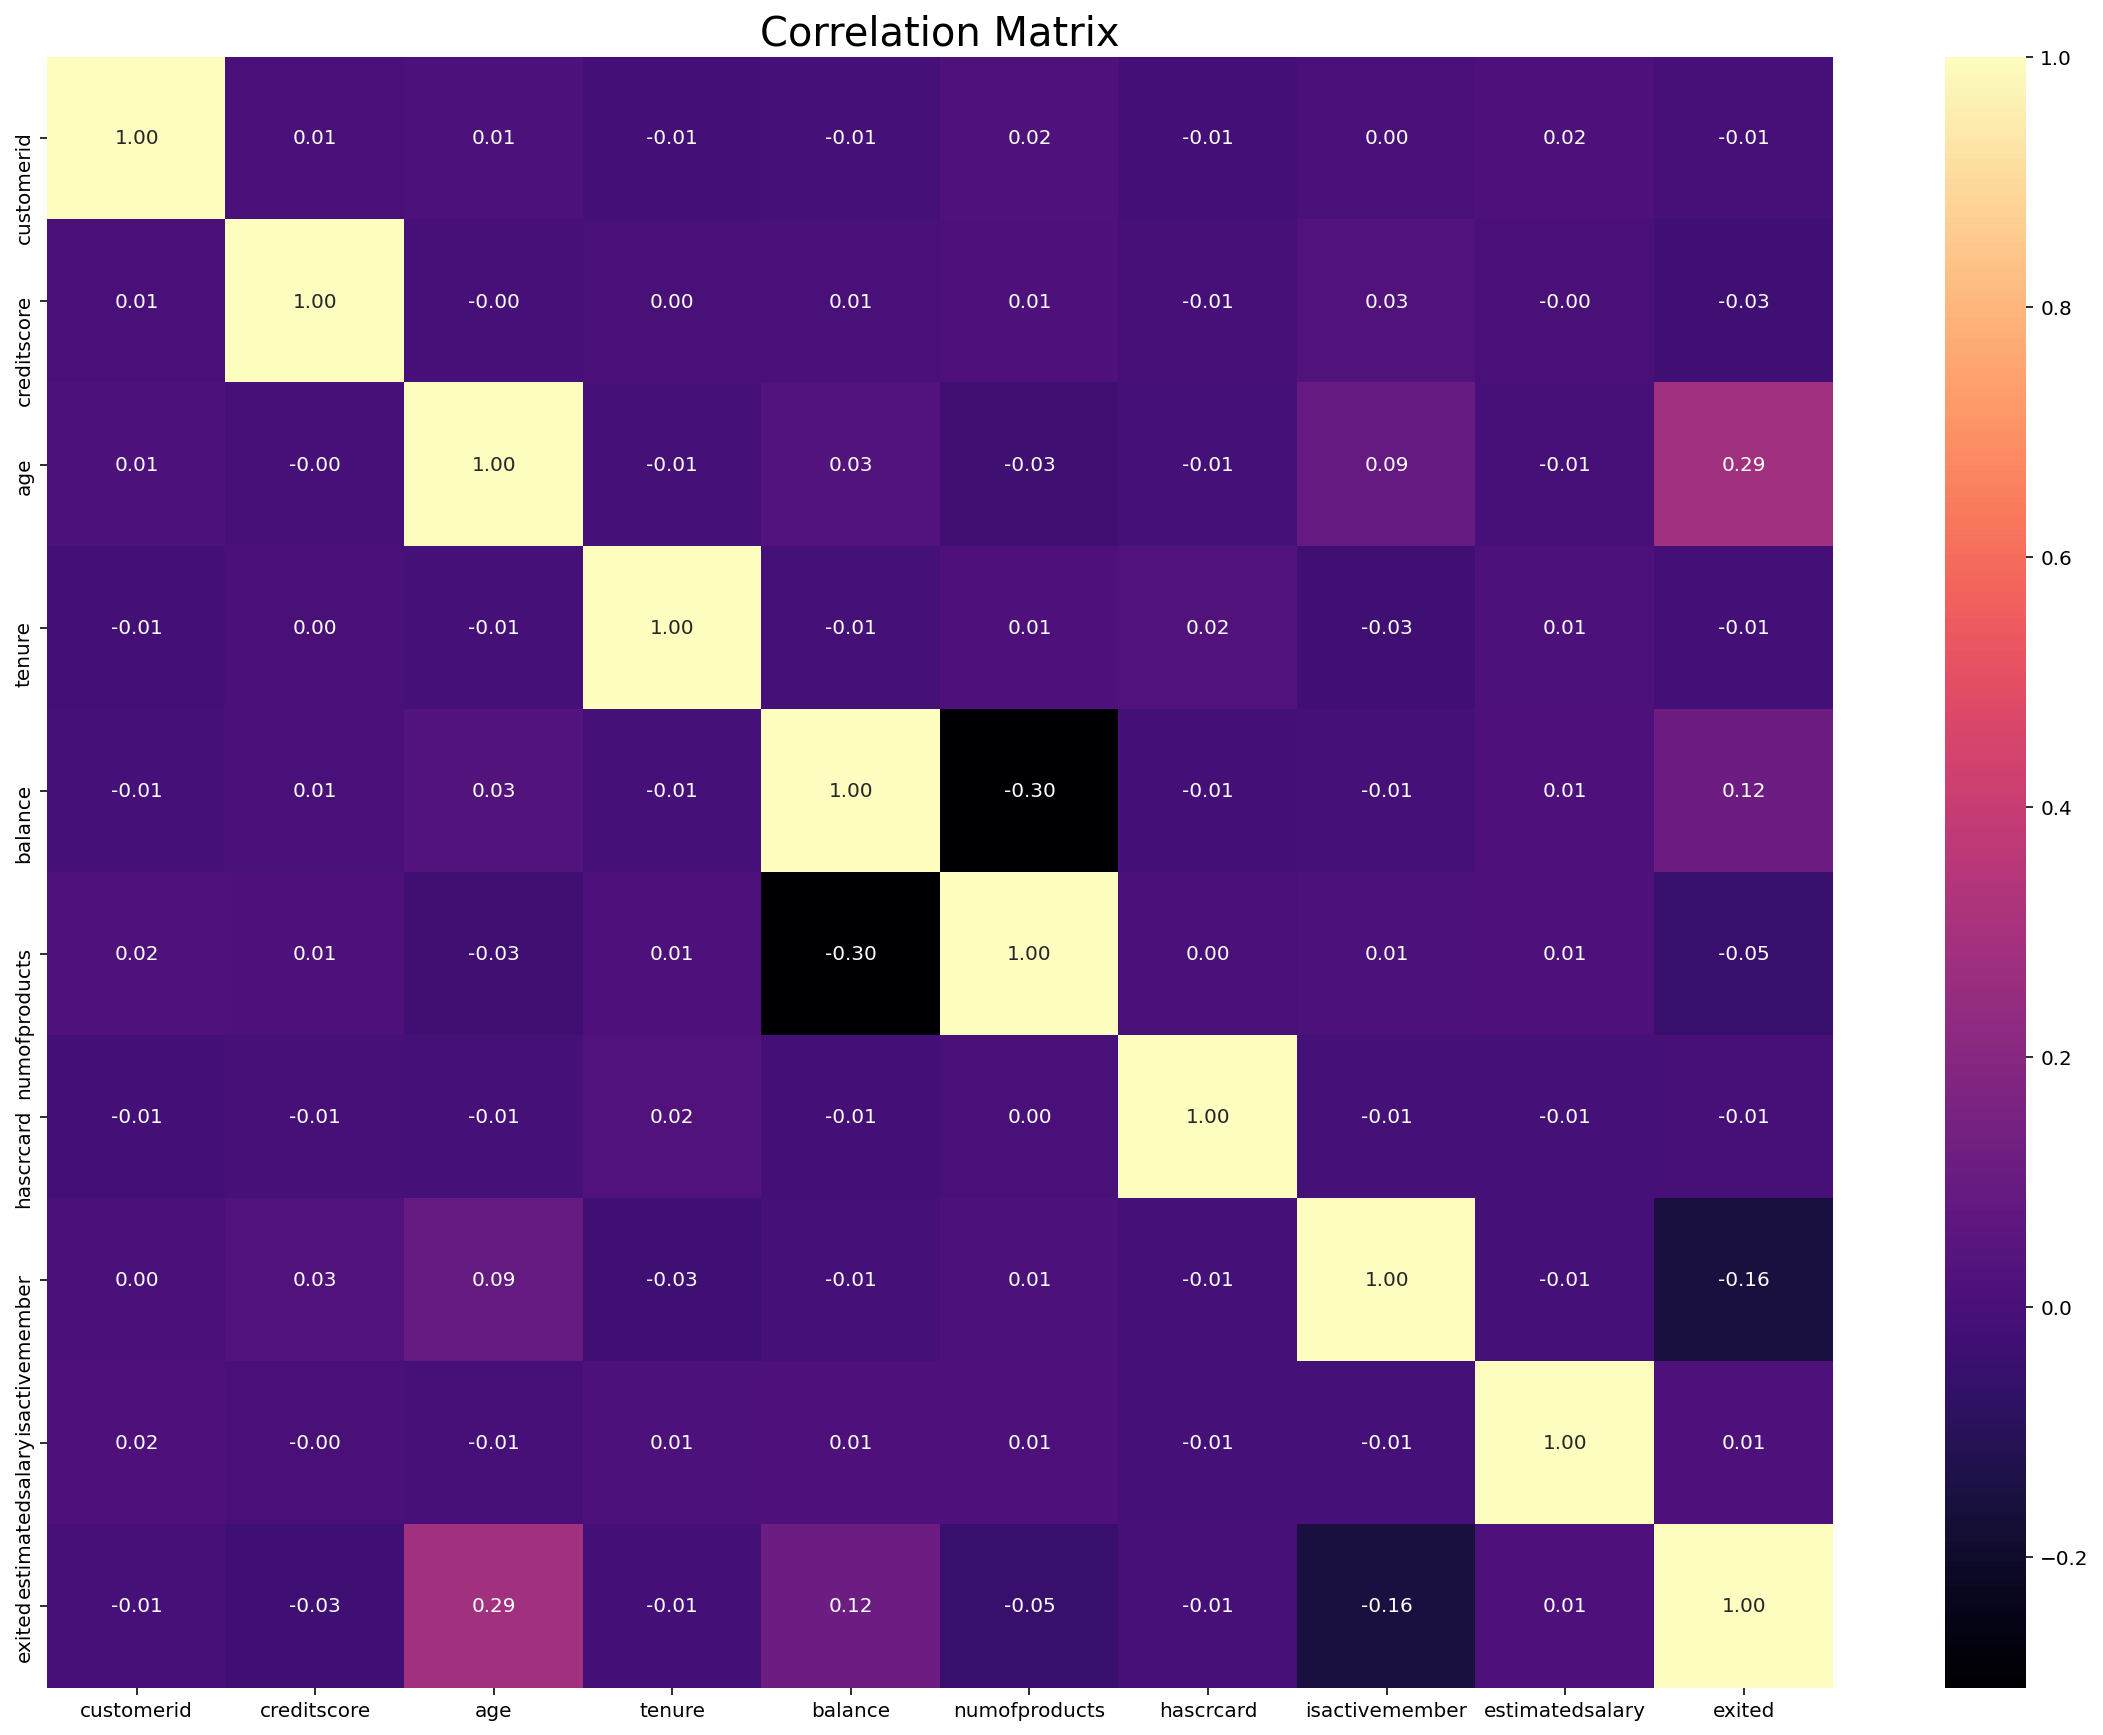

In [2]:
# ------------------------------------------------------1. DATA VISUALIZATION -------------------------------------------------------

def data_visualization(data):
    
    # The distribution of the dependent variable in the data set was analyzed on both pie chart and column chart basis.
    f,ax=plt.subplots(1,2,figsize=(18,8))
    data['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title('Distribution')
    ax[0].set_ylabel('')
    sns.countplot('exited',data=data,ax=ax[1])
    ax[1].set_title('exited')
    plt.show()
    
    # Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='geography', hue = 'exited',data = data, ax=axarr[0][0])
    sns.countplot(x='gender', hue = 'exited',data = data, ax=axarr[0][1])
    sns.countplot(x='hascrcard', hue = 'exited',data = data, ax=axarr[1][0])
    sns.countplot(x='isactivemember', hue = 'exited',data = data, ax=axarr[1][1])
    
    # Boxplot graph for outlier observation analysis
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = data, ax=axarr[0][0])
    sns.boxplot(y='age',x = 'exited', hue = 'exited',data = data, ax=axarr[0][1])
    sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = data, ax=axarr[1][0])
    sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = data, ax=axarr[1][1])
    sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = data, ax=axarr[2][0])
    sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = data, ax=axarr[2][1])
    
    # Correlation Matrix
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

data_visualization(df)

# 3) Data Preprocessing & Modelling

In [3]:
# ------------------------------------------------------ 2. DATA PREPROCESSİNG -------------------------------------------------------

def data_prep(df):
        print("----------Missing Values---------")
        print(df.isnull().sum())
        print("-------Outlier Observations-------")
        for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:

            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3-Q1
            lower = Q1- 1.5*IQR
            upper = Q3 + 1.5*IQR

            if df[(df[feature] > upper)].any(axis=None):
                print(feature,"yes")
            else:
                print(feature, "no")
                
# ------------------------------------------------------ 3. FEATURE ENGINEERING ------------------------------------------------------

def feature_engineering(df):
    df["NewAGT"] = df["age"] - df["tenure"]
    df["NewCreditsScore"] = pd.qcut(df['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    df["NewAgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
    df["NewBalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    df["NewEstSalaryScore"] = pd.qcut(df['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    
    return df

# ------------------------------------------------------ 4. ONE-HOT-ENCODING ---------------------------------------------------------

def one_hot_encoding(df):
    df = pd.get_dummies(df, columns = ["geography", "gender"], drop_first = True)
    df = df.drop(["customerid","surname", "creditscore", "age", "balance", "estimatedsalary"], axis = 1)
    
    return df

# ------------------------------------------------------ 5. SCALİNG ------------------------------------------------------------------

def scaling(df):
    cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]
    y = df["exited"]
    X = df.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
    cols = X.columns
    index = X.index

    from sklearn.preprocessing import RobustScaler
    X = RobustScaler().fit_transform(X)
    X = pd.DataFrame(X, columns = cols, index = index)
    X = pd.concat([X, cat_df], axis = 1)
    
    return X, y

# ------------------------------------------------------ 6. TRAIN-TEST-SPLİT ---------------------------------------------------------

def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 12345)
    return  X_train, X_test, y_train, y_test

# ------------------------------------------------------ 7. BALANCİNG ----------------------------------------------------------------

def balancing(X_train, X_test, y_train, y_test):
    
    # Because it's an unstable data set, we're going to increase the number of samples.
    # References: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html
    from imblearn.combine import SMOTETomek

    smk = SMOTETomek()
    # Oversample training  data
    X_train, y_train = smk.fit_sample(X_train, y_train)

    # Oversample validation data
    X_test, y_test = smk.fit_sample(X_test, y_test)
    
    return X_train, X_test, y_train, y_test

# ------------------------------------------------------ 8. MODELS -------------------------------------------------------------------

def model(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LR', LogisticRegression(random_state = 12345)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
    models.append(('RF', RandomForestClassifier(random_state = 12345)))
    models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
    models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
    models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
    models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

    # evaluate each model in turn
    results = []
    names = []
    
    result_df = pd.DataFrame(columns = ["model", "accuracy_score"])
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result_df.at[index, ["model", "accuracy_score"]] = [name, accuracy]
        index += 1
        
    return result_df.sort_values("accuracy_score", ascending = False)

# ------------------------------------------------------ 9) IMPORTANCE of FEATURE VARİABLES -------------------------------------------------------------------

def feature_importance(X_train, X_test, y_train, y_test):
    models2 = []
    models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
    models2.append(('RF', RandomForestClassifier( random_state = 12345)))
    models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
    models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
    models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

    for name, model in models2:
            base = model.fit(X_train,y_train)
            y_pred = base.predict(X_test)
            acc_score = accuracy_score(y_test, y_pred)
            feature_imp = pd.Series(base.feature_importances_,
                            index=X.columns).sort_values(ascending=False)

            sns.barplot(x=feature_imp, y=feature_imp.index)
            plt.xlabel('Variables Importance Scores')
            plt.ylabel('Variables')
            plt.title(name)
            plt.show()
            
# ------------------------------------------------------ 10) MODEL TUNİNG-------------------------------------------------------------------

def model_tuning(X_train, X_test, y_train, y_test):
    models = []
    models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
    models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
    models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

    # evaluate each model in turn
    results = []
    names = []
    
    model_tuning_result_df = pd.DataFrame(columns = ["tuning_model", "tuning_accuracy_score"])
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_tuning_result_df.at[index, ["tuning_model", "tuning_accuracy_score"]] = [name, accuracy]
        index += 1
        
    return model_tuning_result_df.sort_values("tuning_accuracy_score", ascending = False)

# ------------------------------------------------------ 11) MODEL TUNİNG IMPORTANCE of FEATURE VARİABLES -------------------------------------------------------------------

def model_tuning_feature_importance(X_train, X_test, y_train, y_test):
    
    models2 = []
    models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

    # evaluate each model in turn
    results = []
    names = []

    for name, model_lgbm in models2:
            base = model_lgbm.fit(X_train,y_train)
            y_pred = base.predict(X_test)
            acc_score = accuracy_score(y_test, y_pred)
            feature_imp = pd.Series(base.feature_importances_,
                            index=X.columns).sort_values(ascending=False)

            sns.barplot(x=feature_imp, y=feature_imp.index)
            plt.xlabel("Model Tuning Variables Importance Scores")
            plt.ylabel('Variables')
            plt.title(name)
            plt.show()
            
    return model_lgbm
            
# ------------------------------------------------------ 11) RESULTS-------------------------------------------------------------------
            
def results(result_df, model_tuning_result_df):
    
    df_results = pd.concat([result_df, model_tuning_result_df], axis = 1)
    
    return df_results

# ------------------------------------------------------ 12) CONFUSION MATRIX-----------------------------------------------------------
def confusion_matrix(model_lgbm):
    
    from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
    y_pred = model_lgbm.predict(X_test)
    cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

    TP = cm_xgb[1, 1]
    TN = cm_xgb[0, 0]
    FP = cm_xgb[0, 1]
    FN = cm_xgb[1, 0]

    from matplotlib import rc,rcParams
    def plot_confusion_matrix(cm, classes,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):

        plt.rcParams.update({'font.size': 19})
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title,fontdict={'size':'16'})
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
        plt.yticks(tick_marks, classes,fontsize=12,color="blue")
        rc('font', weight='bold')
        fmt = '.1f'
        thresh = cm.max()
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="red")

        plt.ylabel('True label',fontdict={'size':'16'})
        plt.xlabel('Predicted label',fontdict={'size':'16'})
        plt.tight_layout()

    import itertools
    plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                          title='Confusion matrix')
    
# ------------------------------------------------------ 13) ROC CURVE-----------------------------------------------------------
def roc_curve(model_lgbm):
    
    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
    y_pred_prob = model_lgbm.predict_proba(X_test)[:,1]
    fig, ax = plt.subplots()
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
    ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
    ax.set_xlabel("False Positive Rate", fontsize = 10)
    ax.set_ylabel("True Positive Rate", fontsize = 10)
    ax.set_title("ROC Curve", fontsize = 18)
    ax.legend(loc = 'best')

    close_default = np.argmin(np.abs(thresholds_roc - 0.5))
    ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
    plt.tight_layout()

## 3.1) Missing observation and Outlier observation analysis

In [4]:
data_prep(df)

----------Missing Values---------
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
-------Outlier Observations-------
creditscore no
tenure no
balance no
estimatedsalary no


## 3.2) Feature Engineering

In [5]:
df = feature_engineering(df)
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
RowNumber,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4


## 3.3) One Hot Encoding

In [6]:
df = one_hot_encoding(df)
df.head()

,tenure,numofproducts,hascrcard,isactivemember,exited,NewAGT,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,
1,2,1,1,1,1,40,4,6,1,6,0,0,0
2,1,1,0,1,0,40,4,6,5,6,0,1,0
3,8,3,1,0,1,34,1,6,10,6,0,0,0
4,1,2,0,0,0,38,7,5,1,5,0,0,0
5,2,1,1,1,0,41,10,6,8,4,0,1,0


## 3.4) Scaling

In [7]:
X, y = scaling(df)

In [8]:
X.head()

,tenure,numofproducts,NewAGT,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,,,,,,,,
1,-0.75,0.0,0.666667,-0.2,0.50,-0.9,0.1,0,0,0,1,1
2,-1.00,0.0,0.666667,-0.2,0.50,-0.1,0.1,0,1,0,0,1
3,0.75,2.0,0.166667,-0.8,0.50,0.9,0.1,0,0,0,1,0
4,-1.00,1.0,0.500000,0.4,0.25,-0.9,-0.1,0,0,0,0,0
5,-0.75,0.0,0.750000,1.0,0.50,0.5,-0.3,0,1,0,1,1


In [9]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: exited, dtype: int64

## 3.5) Train-Test Separation

In [10]:
X_train, X_test, y_train, y_test = train_test(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


## 3.6) Balancing

In [11]:
X_train, X_test, y_train, y_test = balancing(X_train, X_test, y_train, y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12668, 12) (3118, 12) (12668,) (3118,)


## 3.7) Model Accuracy Score

In [12]:
result_df = model(X_train, X_test, y_train, y_test)
result_df

,model,accuracy_score
7,CatBoost,0.91084
6,LightGBM,0.909237
5,XGB,0.884541
3,RF,0.854394
4,SVM,0.805645
2,CART,0.801475
1,KNN,0.742784
0,LR,0.740539


## 3.8) Model Feature Importance

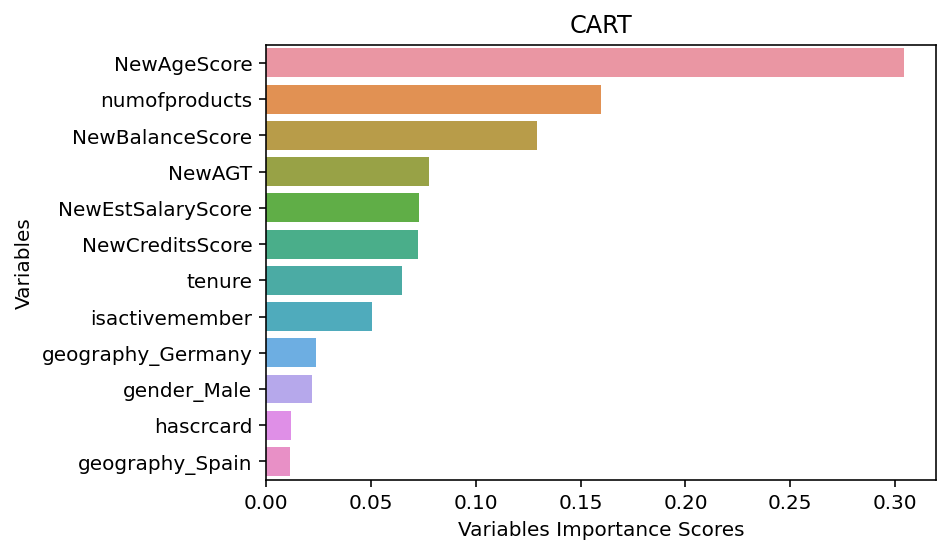

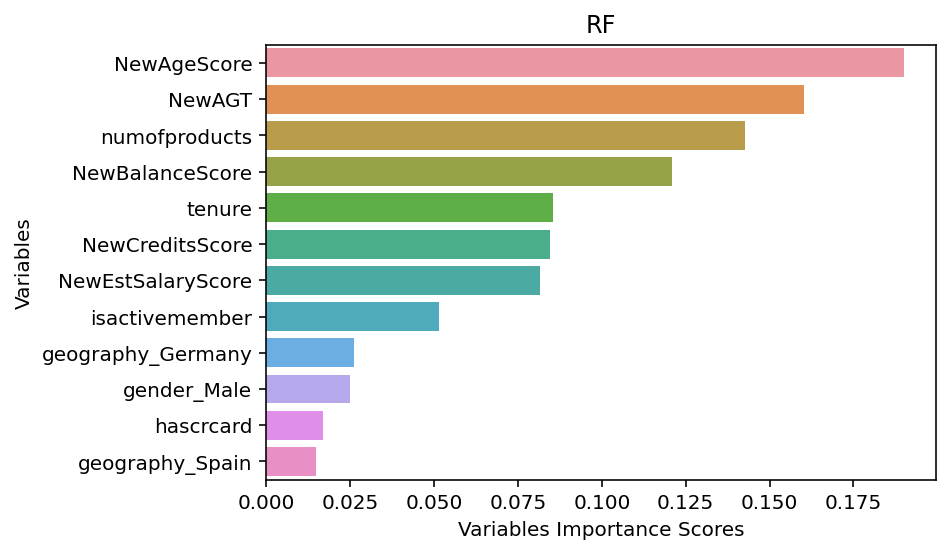

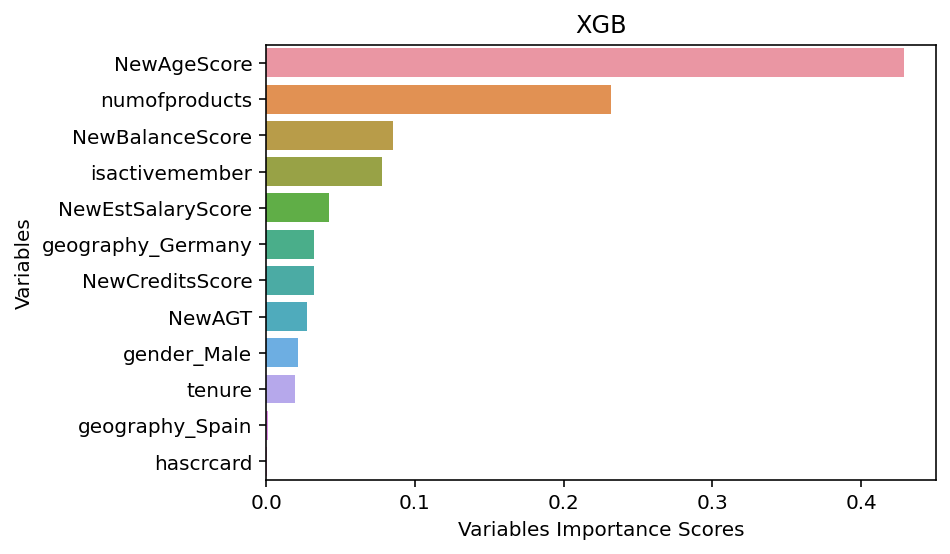

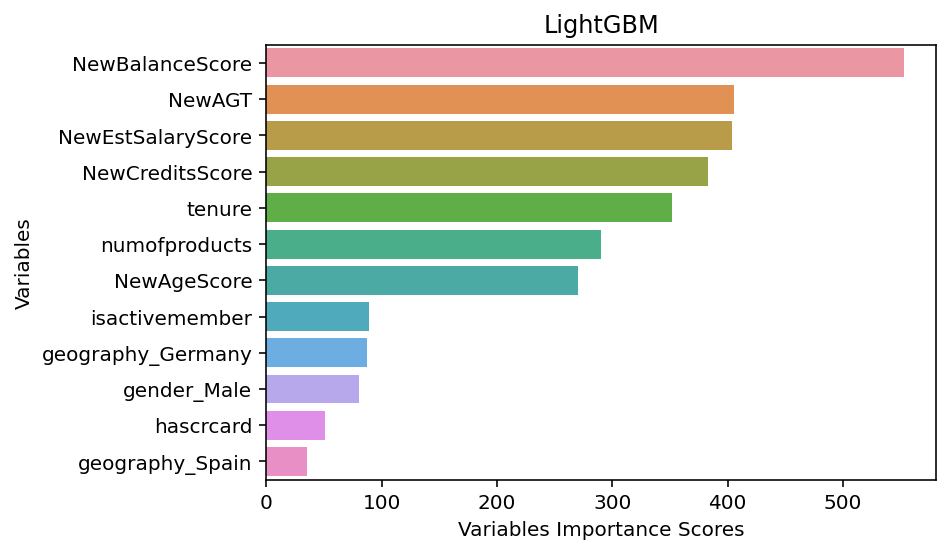

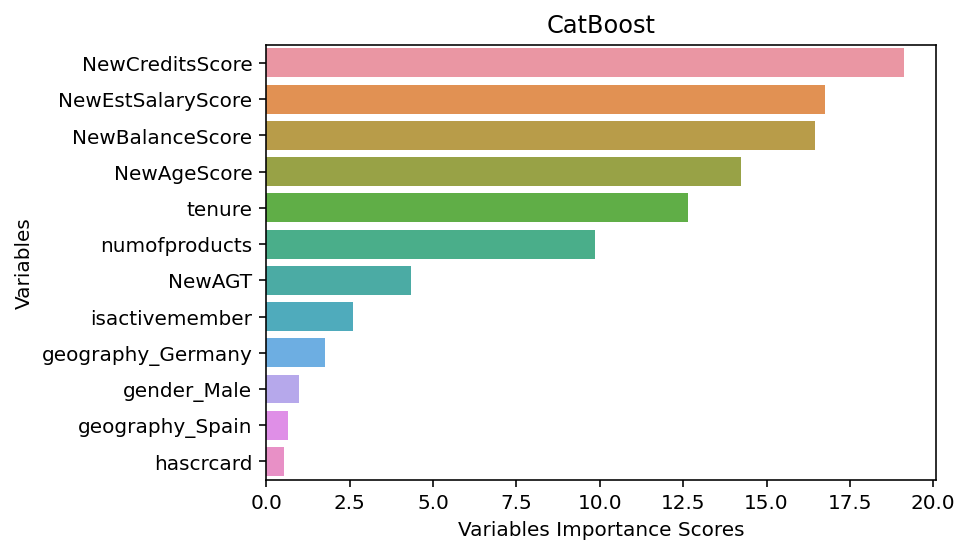

In [13]:
feature_importance(X_train, X_test, y_train, y_test)

# 4) Model Tuning Accuracy Score

In [14]:
# The required hyperparameters have been obtained before.
model_tuning_result_df = model_tuning(X_train, X_test, y_train, y_test)
model_tuning_result_df

,tuning_model,tuning_accuracy_score
1,LightGBM,0.912444
0,XGB,0.911482
2,CatBoost,0.899615


## 4.1) Model Tuning Feature Importance

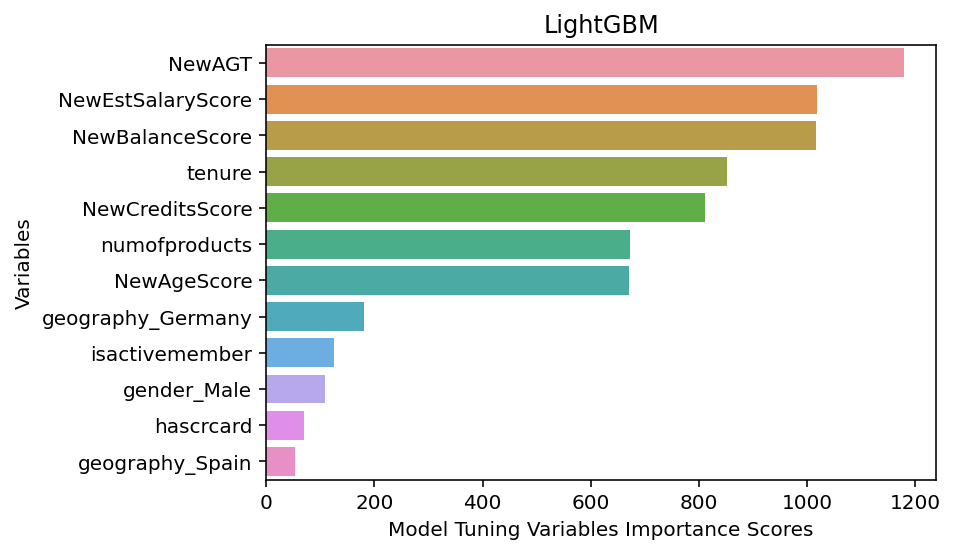

In [15]:
# The variable importance level of the model with the best results was drawn. (LightGBM)
model_lgbm = model_tuning_feature_importance(X_train, X_test, y_train, y_test)

# 5) Results

- According to the results obtained, LightGBM has been the model that gives the best accuracy rate. **(LightGBM = 0.91244)**

In [16]:
results(result_df, model_tuning_result_df)

,model,accuracy_score,tuning_model,tuning_accuracy_score
0,LR,0.740539,XGB,0.911482
1,KNN,0.742784,LightGBM,0.912444
2,CART,0.801475,CatBoost,0.899615
3,RF,0.854394,NaN,NaN
4,SVM,0.805645,NaN,NaN
5,XGB,0.884541,NaN,NaN
6,LightGBM,0.909237,NaN,NaN
7,CatBoost,0.91084,NaN,NaN


# 6) Confusion Matrix

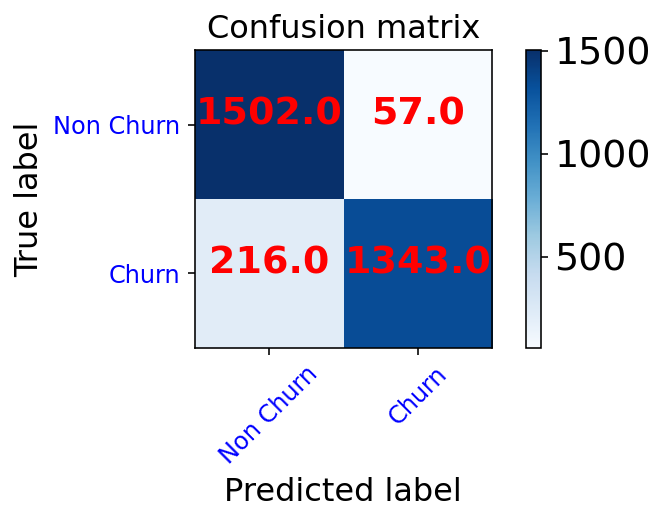

In [17]:
# The confusion matrix of the LightGBM model was drawn.
confusion_matrix(model_lgbm)

# 7)  Roc Curve

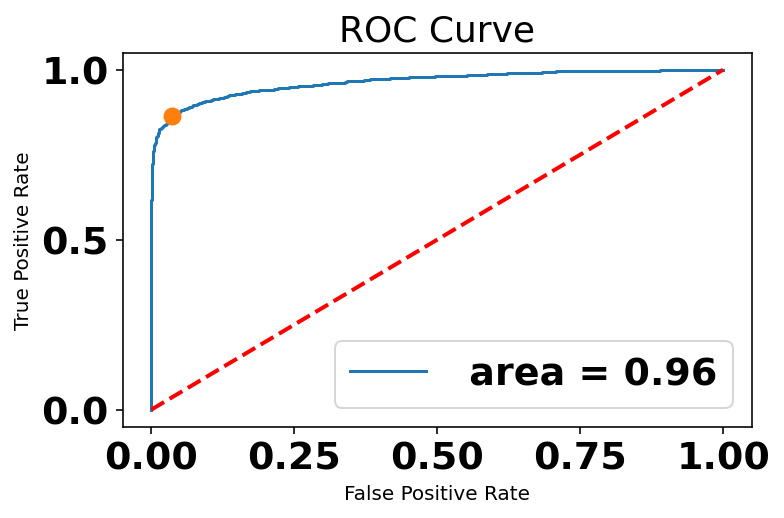

In [18]:
# The ROC curve of the LightGBM model is drawn.
roc_curve(model_lgbm)

# 8) A Function that Runs All Functions

----------Missing Values---------
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
-------Outlier Observations-------
creditscore no
tenure no
balance no
estimatedsalary no
--------------Model Accuracy Score-------------
      model accuracy_score
6  LightGBM       0.908887
7  CatBoost       0.908887
5       XGB       0.889706
3        RF       0.846547
4       SVM       0.810422
2      CART        0.78101
0        LR       0.745524
1       KNN       0.741049


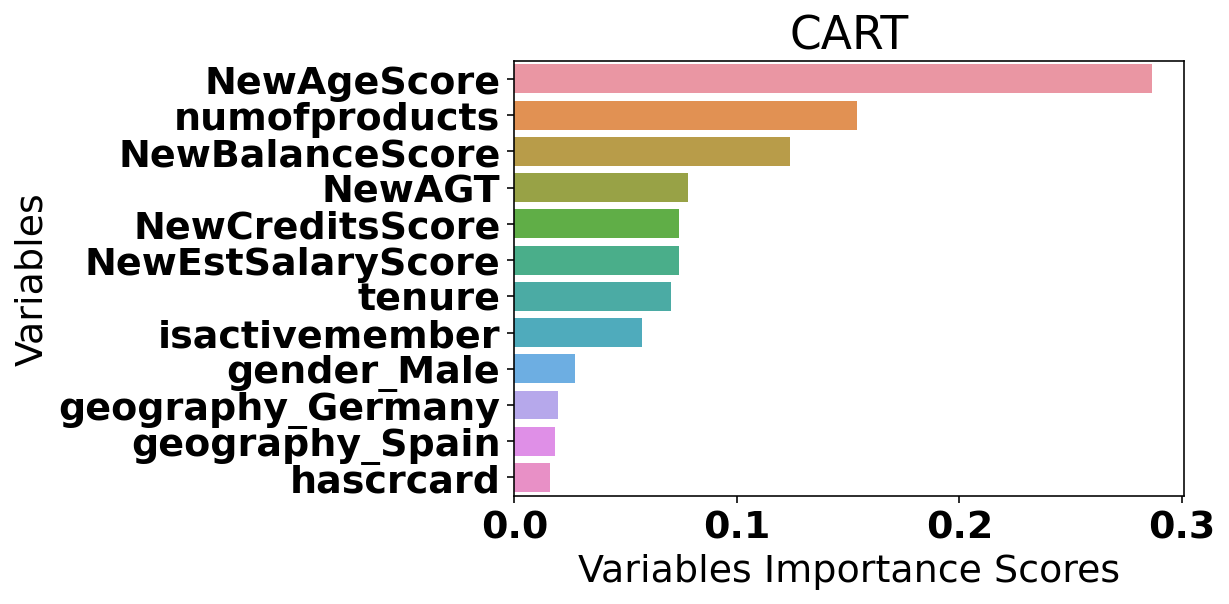

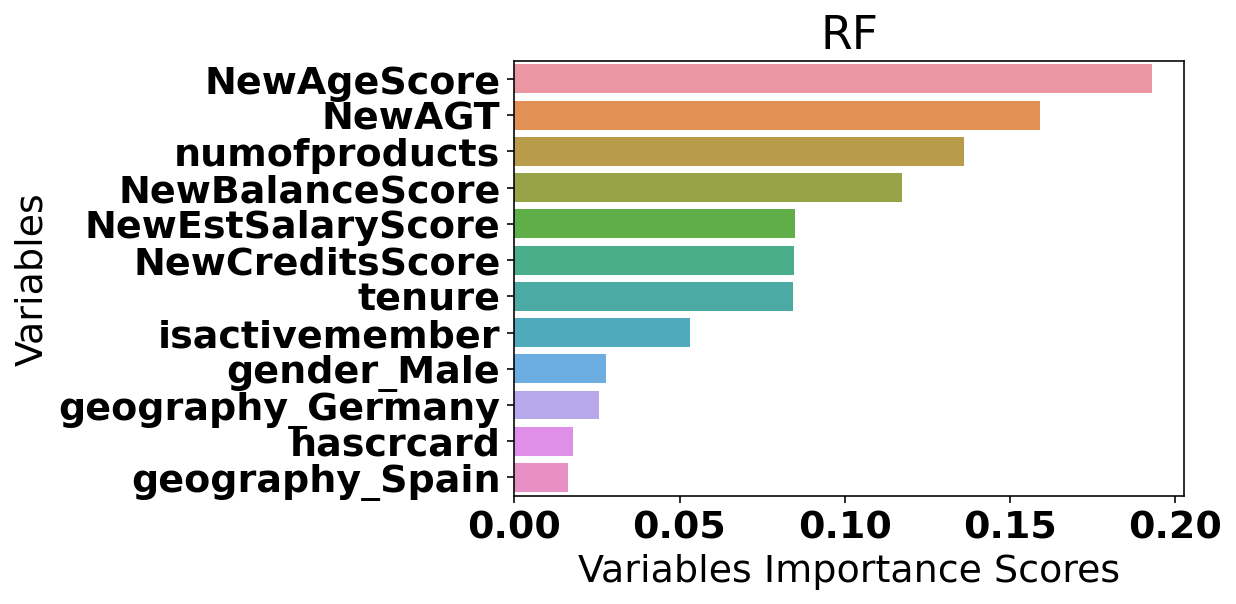

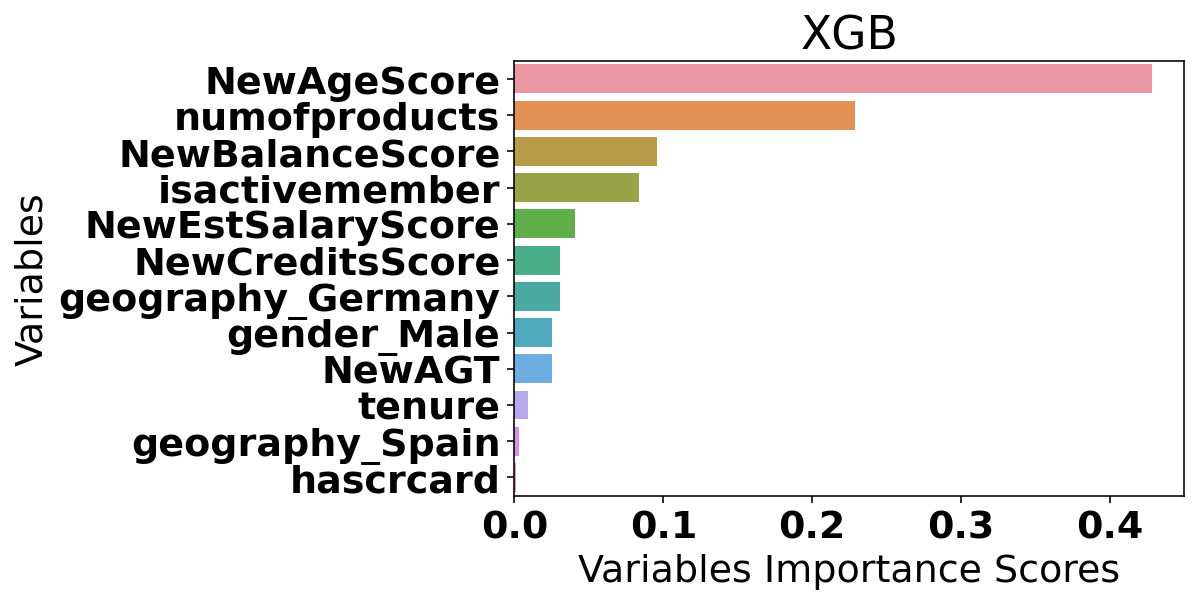

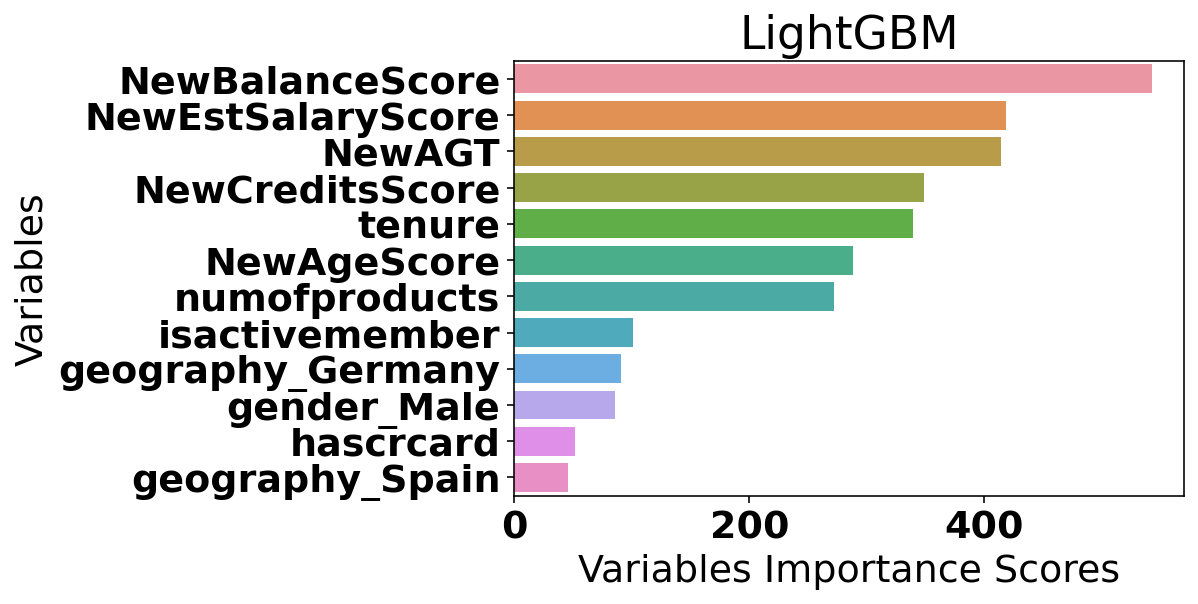

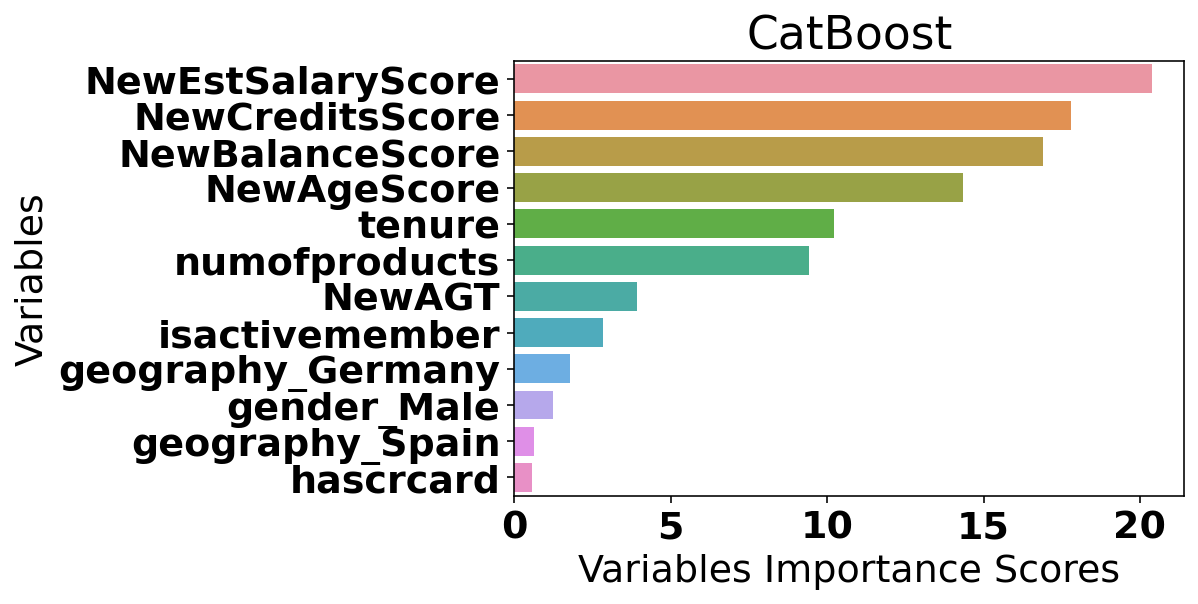

----------Model Tuning Accuracy Score---------
  tuning_model tuning_accuracy_score
1     LightGBM              0.910486
0          XGB              0.909527
2     CatBoost              0.900575


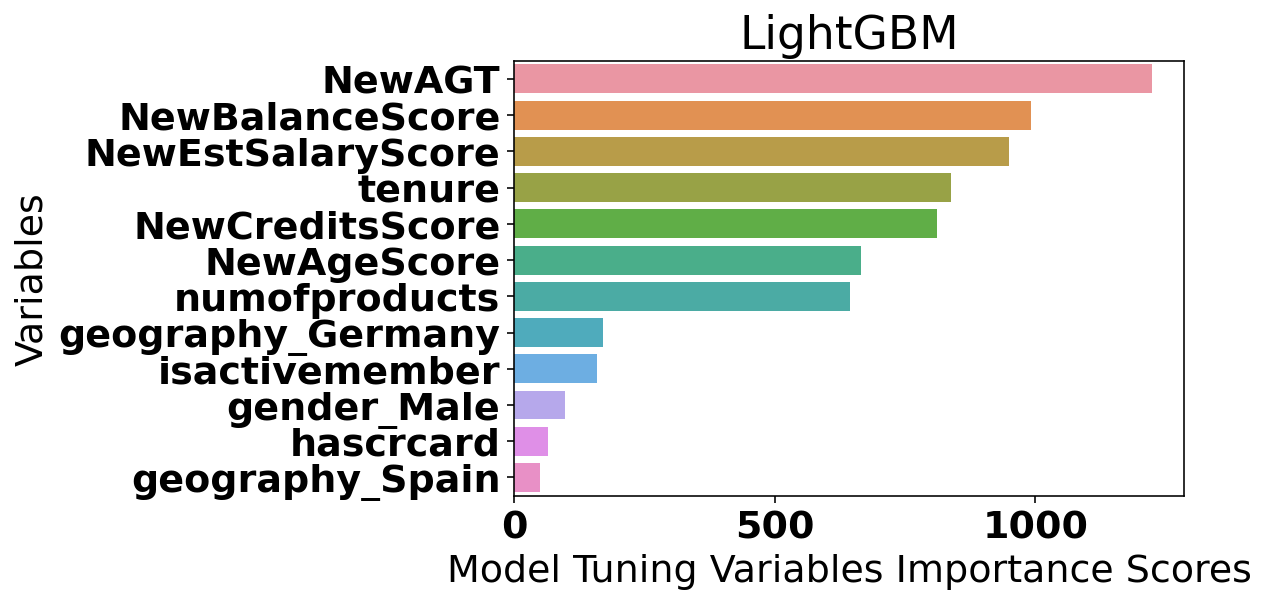

--------------------Results-------------------
      model accuracy_score tuning_model tuning_accuracy_score
0        LR       0.745524          XGB              0.909527
1       KNN       0.741049     LightGBM              0.910486
2      CART        0.78101     CatBoost              0.900575
3        RF       0.846547          NaN                   NaN
4       SVM       0.810422          NaN                   NaN
5       XGB       0.889706          NaN                   NaN
6  LightGBM       0.908887          NaN                   NaN
7  CatBoost       0.908887          NaN                   NaN
------------------Confusion Matrix------------
--------------------Roc Curve------------------


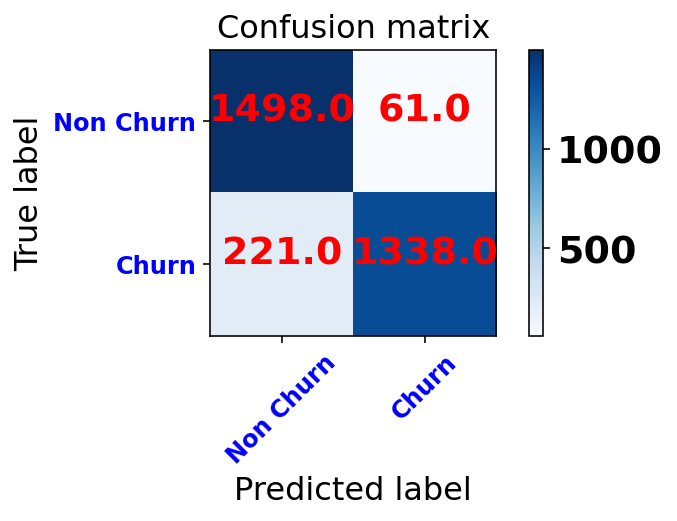

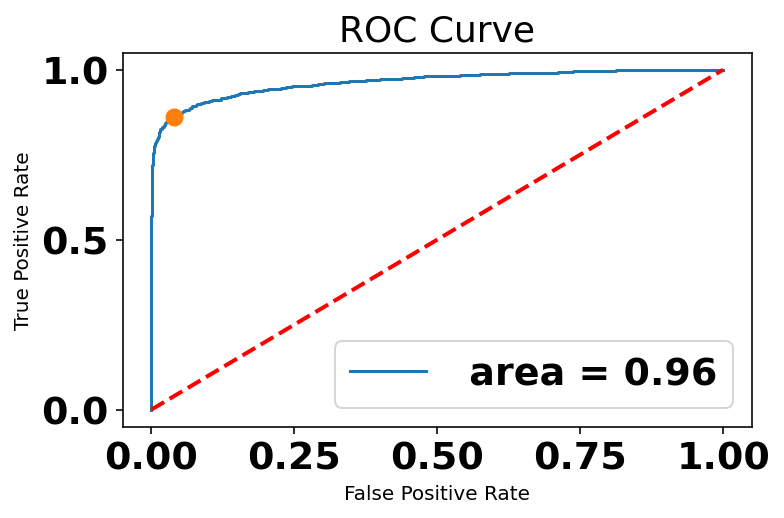

In [21]:
def models(df):
    
    data_prep(df)
    
    df = feature_engineering(df)
    
    df = one_hot_encoding(df)
    
    X, y = scaling(df)
    
    X_train, X_test, y_train, y_test = train_test(X, y)
    
    X_train, X_test, y_train, y_test = balancing(X_train, X_test, y_train, y_test)
    
    print("--------------Model Accuracy Score-------------")
    result_df = model(X_train, X_test, y_train, y_test)
    print(result_df)
    
    feature_importance(X_train, X_test, y_train, y_test)
    
    print("----------Model Tuning Accuracy Score---------")
    model_tuning_result_df = model_tuning(X_train, X_test, y_train, y_test)
    print(model_tuning_result_df)
    
    model_lgbm = model_tuning_feature_importance(X_train, X_test, y_train, y_test)
    
    print("--------------------Results-------------------")
    all_results = results(result_df, model_tuning_result_df)
    print(all_results)
    
    print("------------------Confusion Matrix------------")
    confusion_matrix(model_lgbm)
    
    print("--------------------Roc Curve------------------")
    roc_curve(model_lgbm)

models(df)

# 9) Reporting
The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost like using machine learning models Accuracy  Score were calculated. Later XGBoost, LightGBM, CatBoost hyperparameter optimizations optimized to increase Accuracy score.

5) Result; The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. **(0.91244)**